<small>*Notebook auto-generated from [``altair/examples/json/layer_histogram.vl.json``](../../altair/examples/json/layer_histogram.vl.json)*</small>

# Altair Example: Layer Histogram

--



In [1]:
# Uncomment and run these two lines to enable rendering in JupyterLab/nteract
# from altair import enable_mime_rendering
# enable_mime_rendering()

## Load Dataset
The data comes in the form of a Pandas Dataframe:

In [2]:
from altair import load_dataset
data = load_dataset("flights-2k")
data.head()

,date,delay,destination,distance,origin
0,2001-01-14 21:55:00,0,SMF,480,SAN
1,2001-03-26 20:15:00,-11,SLC,507,PHX
2,2001-03-05 14:55:00,-3,LAX,714,ELP
3,2001-01-07 12:30:00,12,SNA,342,SJC
4,2001-01-18 12:00:00,2,LAX,373,SMF


## Define Altair Specification

In [3]:
from altair import *  # Import the altair API

chart = LayeredChart(data,
    layers=[Chart().mark_bar().encode(
            x=X('distance:Q',
                bin=True,
            ),
            y='count(*):Q',
        ), Chart().mark_bar().encode(
            color=Color(
                value='goldenrod',
            ),
            x=X('distance:Q',
                bin=True,
            ),
            y='count(*):Q',
        ).transform_data(
            filter='datum.delay < 5',
        )],
)

chart.max_rows = len(data)  # Altair 1.2.1 has a max_rows of 500 by default

IPython rich display will invoke Vega-Lite:

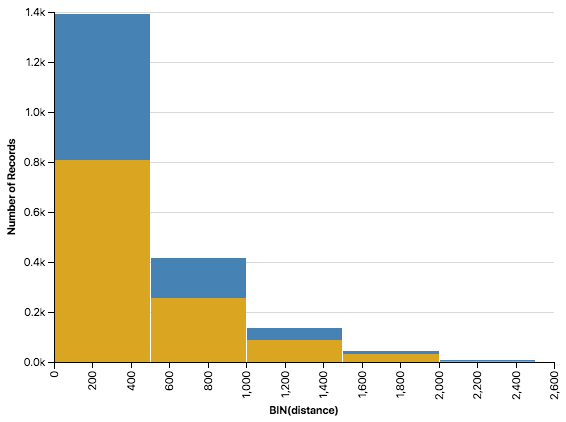

In [4]:
chart

## Output Vega-Lite Specification

Generate JSON dict, leaving data out:

In [5]:
chart.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'layers': [{'encoding': {'x': {'bin': True,
     'field': 'distance',
     'type': 'quantitative'},
    'y': {'aggregate': 'count', 'field': '*', 'type': 'quantitative'}},
   'mark': 'bar'},
  {'encoding': {'color': {'value': 'goldenrod'},
    'x': {'bin': True, 'field': 'distance', 'type': 'quantitative'},
    'y': {'aggregate': 'count', 'field': '*', 'type': 'quantitative'}},
   'mark': 'bar',
   'transform': {'filter': 'datum.delay < 5'}}]}